In [73]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

## Cleaning the data

In [74]:
df_raw = pd.read_csv("2018 NCWIT Award for Aspirations in Computing Recipient.csv")
df_raw

Respondent ID  \
0               NaN   
1      6.928373e+09   
2      6.921763e+09   
3      6.921272e+09   
4      6.920022e+09   
5      6.918388e+09   
6      6.918091e+09   
7      6.917209e+09   
8      6.916428e+09   
9      6.916355e+09   
10     6.916312e+09   
11     6.915655e+09   
12     6.915634e+09   
13     6.915519e+09   
14     6.914998e+09   
15     6.914796e+09   
16     6.914672e+09   
17     6.914558e+09   
18     6.914485e+09   
19     6.914260e+09   
20     6.914217e+09   
21     6.914194e+09   
22     6.914189e+09   
23     6.914158e+09   
24     6.914067e+09   
25     6.914047e+09   
26     6.914029e+09   
27     6.913941e+09   
28     6.913899e+09   
29     6.913885e+09   
...             ...   
1749   6.822760e+09   
1750   6.822760e+09   
1751   6.822758e+09   
1752   6.822758e+09   
1753   6.822756e+09   
1754   6.822755e+09   
1755   6.822755e+09   
1756   6.822754e+09   
1757   6.822754e+09   
1758   6.822751e+09   
1759   6.822749e+09   
1760   6.822748e+09   
1761   6.822747e+09   
1762   6.822746e+09   
1763   6.822746e+09   
1764   6.822746e+09   
1765   6.822744e+09   
1766   6.822743e+09   
1767   6.822743e+09   
1768   6.822743e+09   
1769   6.822742e+09   
1770   6.822742e+09   
1771   6.822742e+09   
1772   6.822741e+09   
1773   6.822741e+09   
1774   6.822741e+09   
1775   6.822740e+09   
1776   6.822739e+09   
1777   6.822739e+09   
1778   6.822739e+09   

     Please select the category that best describes you (you may choose more than one).  \
0                            2018 National Award Winner                                   
1                                                   NaN                                   
2                                                   NaN                                   
3                                                   NaN                                   
4                                                   NaN                                   
5                                                   NaN                                   
6                                                   NaN                                   
7                                                   NaN                                   
8                                                   NaN                                   
9                                                   NaN                                   
10                                                  NaN                                   
11                                                  NaN                                   
12                                                  NaN                                   
13                                                  NaN                                   
14                                                  NaN                                   
15                                                  NaN                                   
16                                                  NaN                                   
17                                                  NaN                                   
18                                                  NaN                                   
19                                                  NaN                                   
20                                                  NaN                                   
21                                                  NaN                                   
22                                                  NaN                                   
23                                                  NaN                                   
24                           2018 National Award Winner                                   
25                                                  NaN                                   
26                                                  NaN                                   
27                             

In [3]:
# number of total rows in raw data
print(len(df_raw))

1779


In [4]:
# column names in raw data
df_raw.columns

Index(['Respondent ID',
       'Please select the category that best describes you (you may choose more than one).',
       'Unnamed: 2', 'Unnamed: 3', 'Unnamed: 4', 'Unnamed: 5',
       'Which Award event(s) did you attend?',
       'If you did not attend an event, please let us know why.',
       'Who was most influential in encouraging you to apply for the NCWIT Aspirations in Computing Award?',
       'Unnamed: 9',
       'Have you joined the NCWIT Aspirations in Computing Facebook group?',
       'In order to improve our program, please tell us why you have not joined the Facebook Group.',
       'What is the best way for NCWIT to communicate opportunities with you?',
       'In addition to Facebook, what would be the best way(s) for you to connect with the rest of the Aspirations community?',
       'Please provide us with specific feedback that can help improve the Aspirations Award application process.',
       'I was motivated to apply for this Award because... (you may select

### Drop the empty rows

In [5]:
# storing all the rows except Respondent ID
# need to do to drop the empty rows
df = df_raw.loc[:, df_raw.columns != "Respondent ID"]

In [6]:
# drop all the rows in the dataset that have no data
no_nulls = df.dropna(how= 'all')
no_nulls

Please select the category that best describes you (you may choose more than one).  \
0                            2018 National Award Winner                                   
1                                                   NaN                                   
2                                                   NaN                                   
4                                                   NaN                                   
5                                                   NaN                                   
6                                                   NaN                                   
7                                                   NaN                                   
8                                                   NaN                                   
9                                                   NaN                                   
10                                                  NaN                                   
11                                                  NaN                                   
12                                                  NaN                                   
13                                                  NaN                                   
14                                                  NaN                                   
15                                                  NaN                                   
17                                                  NaN                                   
19                                                  NaN                                   
20                                                  NaN                                   
21                                                  NaN                                   
23                                                  NaN                                   
24                           2018 National Award Winner                                   
25                                                  NaN                                   
26                                                  NaN                                   
27                                                  NaN                                   
29                                                  NaN                                   
30                                                  NaN                                   
31                                                  NaN                                   
32                                                  NaN                                   
33                                                  NaN                                   
34                           2018 National Award Winner                                   
...                                                 ...                                   
1746                                                NaN                                   
1748                                                NaN                                   
1749                                                NaN                                   
1750                                                NaN                                   
1751                                                NaN                                   
1752                                                NaN                                   
1753                                                NaN                                   
1754                                                NaN                                   
1755                                                NaN                                   
1756                                                NaN                                   
1757                                                NaN                                   
1758                                                NaN                                   
1

In [7]:
# number of rows in the dataset without the nulls
len(no_nulls)

1649

## Breaking down each question

### Question 1

In [5]:
# prints what values are in each column for question 1
print(df_raw["Please select the category that best describes you (you may choose more than one)."].unique())
print(df_raw["Unnamed: 2"].unique())
print(df_raw["Unnamed: 3"].unique())
print(df_raw["Unnamed: 4"].unique())
print(df_raw["Unnamed: 5"].unique())

['2018 National Award Winner' nan]
['2018 National Award Honorable Mention' nan]
['2018 Affiliate (Regional) Award Winner' nan]
['2018 Affiliate (Regional) Award Honorable Mention' nan]
['2018 NCWIT Certificate of Distinction' nan]


In [6]:
# counting the responses in each column
na_winner = df_raw["Please select the category that best describes you (you may choose more than one)."]
na_honorable = df_raw["Unnamed: 2"]
aa_winner = df_raw["Unnamed: 3"]
aa_honorable = df_raw["Unnamed: 4"]
certificate = df_raw["Unnamed: 5"]
print("# of National Award Winner:", na_winner.count())
print("# of National Award Honorable Mention:", na_honorable.count())
print("# of Affiliate (Regional) Award Winner:", aa_winner.count())
print("# of Affiliate (Regional) Award Honorable Mention:", aa_honorable.count())
print("# of NCWIT Certificate of Distinction:", certificate.count())

# of National Award Winner: 86
# of National Award Honorable Mention: 298
# of Affiliate (Regional) Award Winner: 770
# of Affiliate (Regional) Award Honorable Mention: 484
# of NCWIT Certificate of Distinction: 209


In [9]:
# total responses for question 1
a = df_raw["Please select the category that best describes you (you may choose more than one)."].count()
b = df_raw["Unnamed: 2"].count()
c = df_raw["Unnamed: 3"].count()
d = df_raw["Unnamed: 4"].count()
e = df_raw["Unnamed: 5"].count()
responses_1 = a+b+c+d+e
print("Total # of responses to Q1:", responses_1)

Total # of responses to Q1: 1847


1847

<Container object of 5 artists>

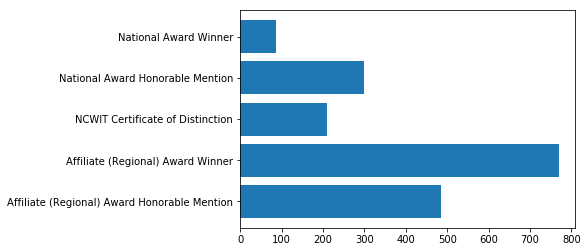

In [20]:
list = ['National Award Winner', 'National Award Honorable Mention', 'Affiliate (Regional) Award Winner', 'Affiliate (Regional) Award Honorable Mention', 'NCWIT Certificate of Distinction']
responses = [a, b, c, d, e]

plt.barh(list, responses)

### Question 2

In [75]:
# total responses for question 2
print("Total # of responses to Q2:", df_raw["Which Award event(s) did you attend?"].count())

Total # of responses to Q2: 1645


In [76]:
# number of each response
df_gb_2 = df_raw.groupby("Which Award event(s) did you attend?")
agg_d = {'Respondent ID' : 'count'}
df_agg_2 = df_gb_2.agg(agg_d).drop('Response').reset_index().sort_values('Respondent ID')
df_agg_2

Which Award event(s) did you attend?  Respondent ID
2      National Award in Charlotte, NC             18
1                                 Both             20
3                                 None            641
0           Affiliate (Regional) Award            965

In [77]:
# the 38 people who attended the National Award ceremony 
# 10 National Award Winners
# 4 Affiliate Honorable Mention
# 14 that won both National Award and Regional Award
# 1 won all four awards
# 4 Affiliate Award Winners
# 4 National Honorable Mention
# 1 won both National and Affiliate Honorable Mention
df_raw[df_raw["Which Award event(s) did you attend?"] == 'Both']

Respondent ID  \
112    6.907901e+09   
182    6.904322e+09   
324    6.901135e+09   
354    6.901117e+09   
387    6.899731e+09   
471    6.890577e+09   
555    6.875734e+09   
593    6.875239e+09   
702    6.874948e+09   
832    6.867429e+09   
912    6.866588e+09   
1088   6.866365e+09   
1099   6.866359e+09   
1104   6.866358e+09   
1388   6.834177e+09   
1523   6.825184e+09   
1653   6.823134e+09   
1667   6.823077e+09   
1693   6.822921e+09   
1770   6.822742e+09   

     Please select the category that best describes you (you may choose more than one).  \
112                                                 NaN                                   
182                          2018 National Award Winner                                   
324                          2018 National Award Winner                                   
354                                                 NaN                                   
387                          2018 National Award Winner                                   
471                                                 NaN                                   
555                          2018 National Award Winner                                   
593                          2018 National Award Winner                                   
702                          2018 National Award Winner                                   
832                                                 NaN                                   
912                                                 NaN                                   
1088                         2018 National Award Winner                                   
1099                         2018 National Award Winner                                   
1104                         2018 National Award Winner                                   
1388                         2018 National Award Winner                                   
1523                         2018 National Award Winner                                   
1653                                                NaN                                   
1667                         2018 National Award Winner                                   
1693                         2018 National Award Winner                                   
1770                         2018 National Award Winner                                   

                                 Unnamed: 2  \
112                                     NaN   
182                                     NaN   
324                                     NaN   
354                                     NaN   
387                                     NaN   
471   2018 National Award Honorable Mention   
555                                     NaN   
593                                     NaN   
702                                     NaN   
832   2018 National Award Honorable Mention   
912                                     NaN   
1088                                    NaN   
1099                                    NaN   
1104                                    NaN   
1388                                    NaN   
1523                                    NaN   
1653  2018 National Award Honorable Mention   
1667                                    NaN   
1693                                    NaN   
1770                                    NaN   

                                  Unnamed: 3  \
112                                      NaN   
182   2018 Affiliate (Regional) Award Winner   
324                                      NaN   
354                                      NaN   
387   2018 Affiliate (Regional) Award Winner   
471                                      NaN   
555   2018 Affiliate (Regional) Award Winner   
593   2018 Affiliate (Regional) Award Winner   
702   2018 Affiliate (Regional) Award Winner   
832                                      NaN   
912                                      NaN   
1088  2018 Affiliate (Regional) Award Winner  

Text(0,0.5,'Event')

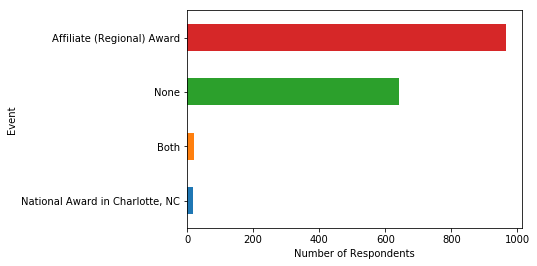

In [46]:
ax = df_agg_2.plot('Which Award event(s) did you attend?', 'Respondent ID', kind = 'barh')
ax.legend_.remove()

plt.xlabel('Number of Respondents')
plt.ylabel('Event')

### Question 3

In [13]:
# total number of responses for question 3
print("Total # of responses to Q3:", df_raw["If you did not attend an event, please let us know why."].count())
df_raw["If you did not attend an event, please let us know why."].dropna().head()

Total # of responses to Q3: 634


0                                  Open-Ended Response
1             I don't think that I was supposed to go.
2    I wasn't recognized until after the events hap...
4                                   I was not asked to
5                    There was not enough room for me.
Name: If you did not attend an event, please let us know why., dtype: object

### Question 4

In [78]:
# total number of responses for question 4
df_raw["Who was most influential in encouraging you to apply for the NCWIT Aspirations in Computing Award?"].count()

1643

In [82]:
# number of each response
df_gb_4 = df_raw.groupby("Who was most influential in encouraging you to apply for the NCWIT Aspirations in Computing Award?")
agg_d = {"Respondent ID" : 'count'}
df_agg_4 = df_gb_4.agg(agg_d).drop('Response').reset_index().sort_values('Respondent ID', ascending = False)
df_agg_4

Who was most influential in encouraging you to apply for the NCWIT Aspirations in Computing Award?  \
5                                   Teacher/Educator                                                   
2                                             Myself                                                   
4                   Parent/Guardian or Family Member                                                   
0                                    Academic Mentor                                                   
1                                             Friend                                                   
3                             Other (please specify)                                                   

   Respondent ID  
5           1019  
2            232  
4            174  
0            118  
1             76  
3             23

Text(0,0.5,'Event')

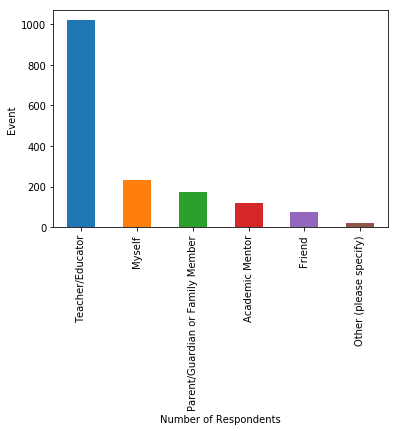

In [83]:
ax = df_agg_4.plot("Who was most influential in encouraging you to apply for the NCWIT Aspirations in Computing Award?", 'Respondent ID', kind = 'bar')
ax.legend_.remove()

plt.xlabel('Number of Respondents')
plt.ylabel('Event')

In [16]:
# 'other' responses to question 4
print("Total # of responses to 'other' for Q4:", df_raw['Unnamed: 9'].count())
df_raw['Unnamed: 9'].dropna()

Total # of responses to 'other' for Q4: 22


0                                  Other (please specify)
29                                                 No one
150                  Girl scouts of Orange county website
292                                                Alumna
309                                             Principal
411     Graduate students running an AspireIT camp for...
423                               IU's CEWiT Organization
647                           University affiliate member
670     During an interview for my state’s governor’s ...
819                                        Girls Who Code
888                    My academic councilor Mrs. McNeil 
892                              Girls Who Code community
1109                                              My boss
1210                                       summer program
1304    I had multiple people such as my teacher and m...
1334    I was encourages by an NCWIT staff member via ...
1354     Two mentors from the Digital Nest in Watsonville
1357          

### Question 5

In [84]:
# total number of responses for question 5
df_raw['Have you joined the NCWIT Aspirations in Computing Facebook group?'].count()

1643

In [85]:
# number of each responses for Question 5
df_gb_5 = df_raw.groupby('Have you joined the NCWIT Aspirations in Computing Facebook group?')
agg_d = {'Have you joined the NCWIT Aspirations in Computing Facebook group?' : 'count'}
df_agg_5 = df_gb_5.agg(agg_d)
df_agg_5

Have you joined the NCWIT Aspirations in Computing Facebook group?
Have you joined the NCWIT Aspirations in Comput...                                                                    
No                                                                                                976                 
Response                                                                                            1                 
Yes                                                                                               666

### Question 6

In [19]:
# total number of responses for question 6
print("Total # of responses to 'other' for Q6:", df_raw['In order to improve our program, please tell us why you have not joined the Facebook Group.'].count())
df_raw['In order to improve our program, please tell us why you have not joined the Facebook Group.'].dropna().head()

Total # of responses to 'other' for Q6: 890


0                                  Open-Ended Response
1    I did not know that there was a Facebook group...
2    I actually did not have a Facebook at the time...
5    I do not use Facebook. Most people my age have...
6                    I do not have a Facebook account.
Name: In order to improve our program, please tell us why you have not joined the Facebook Group., dtype: object

### Question 7

In [20]:
# total number of responses for question 7
print("Total # of responses to 'other' for Q7:", df_raw['What is the best way for NCWIT to communicate opportunities with you?'].count())
df_raw['What is the best way for NCWIT to communicate opportunities with you?'].dropna().head()

Total # of responses to 'other' for Q7: 1443


0                             Open-Ended Response
1                                   Through email
2    Either through email or the Facebook group. 
4                                           Email
5                 They can email my school email.
Name: What is the best way for NCWIT to communicate opportunities with you?, dtype: object

### Question 8

In [21]:
# total number of responses for question 8
print("Total # of responses to 'other' for Q8:", df_raw['In addition to Facebook, what would be the best way(s) for you to connect with the rest of the Aspirations community?'].count())
df_raw['In addition to Facebook, what would be the best way(s) for you to connect with the rest of the Aspirations community?'].dropna().head()

Total # of responses to 'other' for Q8: 1265


0                                  Open-Ended Response
1     A specific website or page with a way to connect
2    I'm not sure what the Facebook has, but I find...
4                          Snapchat, instagram, emails
5                          Possibly through instagram.
Name: In addition to Facebook, what would be the best way(s) for you to connect with the rest of the Aspirations community?, dtype: object

### Question 9

In [22]:
# total number of responses for question 9
print("Total # of responses to 'other' for Q9:", df_raw['Please provide us with specific feedback that can help improve the Aspirations Award application process.'].count())
df_raw['Please provide us with specific feedback that can help improve the Aspirations Award application process.'].dropna().head()

Total # of responses to 'other' for Q9: 729


0                                  Open-Ended Response
1    I didn't actually know that I received an awar...
2    I didn't hear anything about the results for a...
5    It is quite tedious. Perhaps you can create le...
6    I would enjoy an increased explanation of what...
Name: Please provide us with specific feedback that can help improve the Aspirations Award application process., dtype: object

### Question 10

In [23]:
# prints what values are in each column for question 10
print(df_raw['I was motivated to apply for this Award because... (you may select as many as apply)'].unique())
print(df_raw["Unnamed: 16"].unique())
print(df_raw["Unnamed: 17"].unique())
print(df_raw["Unnamed: 18"].unique())
print(df_raw["Unnamed: 19"].unique())
print(df_raw["Unnamed: 20"].unique())

['I enjoy computing!' nan]
['I thought it would be a great scholarship opportunity.' nan]
['I wanted to join the NCWIT Aspirations in Computing community.' nan]
['I wanted to display my accomplishments in computing.' nan]
['I was encouraged to apply.' nan]
['I thought it could help me explore computing careers.' nan]


In [24]:
# counting the responses in each column
enjoy_computing = df_raw['I was motivated to apply for this Award because... (you may select as many as apply)'].count()
scholarship_opp = df_raw["Unnamed: 16"].count()
want_join = df_raw["Unnamed: 17"].count()
want_accomplishments = df_raw["Unnamed: 18"].count()
encourage_apply = df_raw["Unnamed: 19"].count()
explore_computing = df_raw["Unnamed: 20"].count()
other_10 = df_raw["Unnamed: 21"].count()
print("I enjoy computing! :", enjoy_computing)
print("Great scholarship opportunity :", scholarship_opp)
print("Wanted to join Aspirations community :", want_join)
print("Display computing accomplishments :", want_accomplishments)
print("Encouraged to apply :", encourage_apply)
print("Explore computing careers :", explore_computing)
print("Other :", other_10)

I enjoy computing! : 1155
Great scholarship opportunity : 904
Wanted to join Aspirations community : 656
Display computing accomplishments : 753
Encouraged to apply : 1069
Explore computing careers : 780
Other : 27


In [6]:
other = df_raw["Unnamed: 21"].dropna()
other

0                                  Other (please specify)
88      I wanted the opportunity to establish a coding...
335                                To put on college apps
386     I like to encourage others around me and be in...
418     It is a great way to be recognized for our ach...
433          I wanted to experience more about computing.
485                                                    no
533              I want to promote women in these fields.
571     I want to be more connected with other girls i...
832     when my teacher talked about the connections t...
854                                  I heard about prizes
890     The community of girls is so supportive and un...
940                                Looks good on a resume
978     It's a chance for some kind of opportunity, so...
993     I wanted to see if I had potential to be succe...
1000                                                   It
1022                                                   Hi
1088          

In [25]:
# total responses for question 10
print("Total # of responses to Q10:", enjoy_computing + scholarship_opp + want_join + want_accomplishments + encourage_apply + explore_computing + other_10)

Total # of responses to 'other' for Q10: 5344


### Question 11

In [26]:
# recode the scaled items to numbers
relabel_11 = no_nulls[["Please rate the following Impact items from Strongly Agree to Strongly Disagree.Being a recipient of the Award for Aspirations in Computing...",
                    'Unnamed: 23', 'Unnamed: 24', 'Unnamed: 25', 'Unnamed: 26', 'Unnamed: 27', 'Unnamed: 28',
                    "Unnamed: 29"]].dropna().replace("Strongly Disagree", 1).replace("Disagree", 2).replace("Neither Agree nor Disagree", 3).replace("Agree", 4).replace("Strongly Agree", 5)
relabel_11

Please rate the following Impact items from Strongly Agree to Strongly Disagree.Being a recipient of the Award for Aspirations in Computing...  \
0     Increased my commitment to pursuing a computer...                                                                                               
1                                                     4                                                                                               
2                                                     4                                                                                               
6                                                     4                                                                                               
9                                                     3                                                                                               
12                                                    4                                                                                               
13                                                    4                                                                                               
14                                                    3                                                                                               
15                                                    3                                                                                               
19                                                    3                                                                                               
20                                                    4                                                                                               
21                                                    3                                                                                               
23                                                    4                                                                                               
24                                                    1                                                                                               
25                                                    5                                                                                               
26                                                    4                                                                                               
29                                                    1                                                                                               
30                                                    5                                                                                               
31                                                    4                                                                                               
32                                                    4                                                                                               
33                                                    4                                                                                               
34                                                    3                                                                                               
35                                                    2                                                                                               
36                                                    4                                                                                               
41                                                    5                                                                                               
44                                                    3                        

In [27]:
# the number of complete rows of Q11 data, no missing data
print("Total # of responses to 'other' for Q11:", len(relabel_11))

Total # of responses to 'other' for Q11: 1037


### Question 12

In [28]:
print("Total # of responses to 'other' for Q12:", df_raw['Because of this Award, I am more...'].count())
df_raw['Because of this Award, I am more...'].dropna().head()

Total # of responses to 'other' for Q12: 1098


0                                  Open-Ended Response
1               likely to explore careers in computing
2    confident in my ability to program and be a me...
4                                           Confident.
5    Motivated to keep exploring the CS field and c...
Name: Because of this Award, I am more..., dtype: object

### Question 13

In [29]:
print("Total # of responses to 'other' for Q13:", df_raw['Because of this Award, I am less...'].count())
df_raw['Because of this Award, I am less...'].dropna().head()

Total # of responses to 'other' for Q13: 989


0                                  Open-Ended Response
1    afraid that I'm not fit for a job in the tech ...
2    unsure about whether or not I want to go into ...
4                                              Afraid.
5          Scared of trying new CS classes and fields.
Name: Because of this Award, I am less..., dtype: object

### Question 14

In [30]:
print("Total # of responses to 'other' for Q14:", df_raw['Is there anything else you would like to share with us regarding the Award for Aspirations in Computing?'].count())
df_raw['Is there anything else you would like to share with us regarding the Award for Aspirations in Computing?'].dropna().head()

Total # of responses to 'other' for Q14: 625


0                                  Open-Ended Response
1    Thank you so much for the great opportunities ...
2                                          Not really!
6    It was an eye-opening application that helped ...
8                                                 nope
Name: Is there anything else you would like to share with us regarding the Award for Aspirations in Computing?, dtype: object

In [5]:
codes = ('C', 'M', 'A', 'I', 'O', 'E', 'CN', 'B')
keys = ('Confident', 'Motivated', 'Aware', 'Interested', 'Other', 'Encouraged', 'Connected', 'Bad Comment')

q14_help = pd.DataFrame({'Key' : keys, 
                         'Code' : codes})
q14_help

Key Code
0    Confident    C
1    Motivated    M
2        Aware    A
3   Interested    I
4        Other    O
5   Encouraged    E
6    Connected   CN
7  Bad Comment    B